# 1 Installing the YOLOv8 Environment

To start off with YOLOv8 we first clone the YOLOv8 repository and install dependencies. This will set up our programming environment to be ready to running object detection training and inference commands.

In [1]:
# Clone repository
!git clone https://github.com/ultralytics/ultralytics

# Navigate to the cloned directory
%cd ultralytics

# Install the package in editable mode for development
!pip install -e .

C:\Users\CP1\Documents\GitHub\Itemized-Billing\ultralytics


fatal: destination path 'ultralytics' already exists and is not an empty directory.


Obtaining file:///C:/Users/CP1/Documents/GitHub/Itemized-Billing/ultralytics
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.165


ERROR: Cannot uninstall ultralytics 8.0.165, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps ultralytics==8.0.165'.


# 2 Import Libraries

In [2]:
import torch
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
from ultralytics import YOLO

import yaml
import glob
from IPython.display import Image, display
from IPython.core.magic import register_line_cell_magic

from DataAugmentation import DataAugmentation

torch 1.13.1+cu116 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3090', major=8, minor=6, total_memory=24575MB, multi_processor_count=82)


In [3]:
%cd ..

# Open and read the YAML file
with open('configuration/config-HB.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)

yaml_data

C:\Users\CP1\Documents\GitHub\Itemized-Billing


{'path': 'C:/Users/CP1/Documents/GitHub/Itemized-Billing/HB-yolo-1.1',
 'train': 'train.txt',
 'val': 'valid.txt',
 'nc': 1,
 'names': ['table']}

In [4]:
# Define number of classes based on YAML
with open('configuration/config-HB.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(f'Number of class: {num_classes}')

Number of class: 1


In [5]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\CP1\Documents\GitHub\Itemized-Billing


# 3 Train YOLOv8

In [11]:
model = YOLO('yolov8s.pt')  # build a new model from scratch

results = model.train(data='configuration/config-HB.yaml', epochs=50, workers=2, imgsz=416)  # train the model

New https://pypi.org/project/ultralytics/8.0.194 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.171  Python-3.10.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=configuration/config-HB.yaml, epochs=50, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

# 4 Evaluate the model

In [12]:
results.results_dict

{'metrics/precision(B)': 0.9986141406653237,
 'metrics/recall(B)': 1.0,
 'metrics/mAP50(B)': 0.995,
 'metrics/mAP50-95(B)': 0.9859482625482627,
 'fitness': 0.9868534362934365}

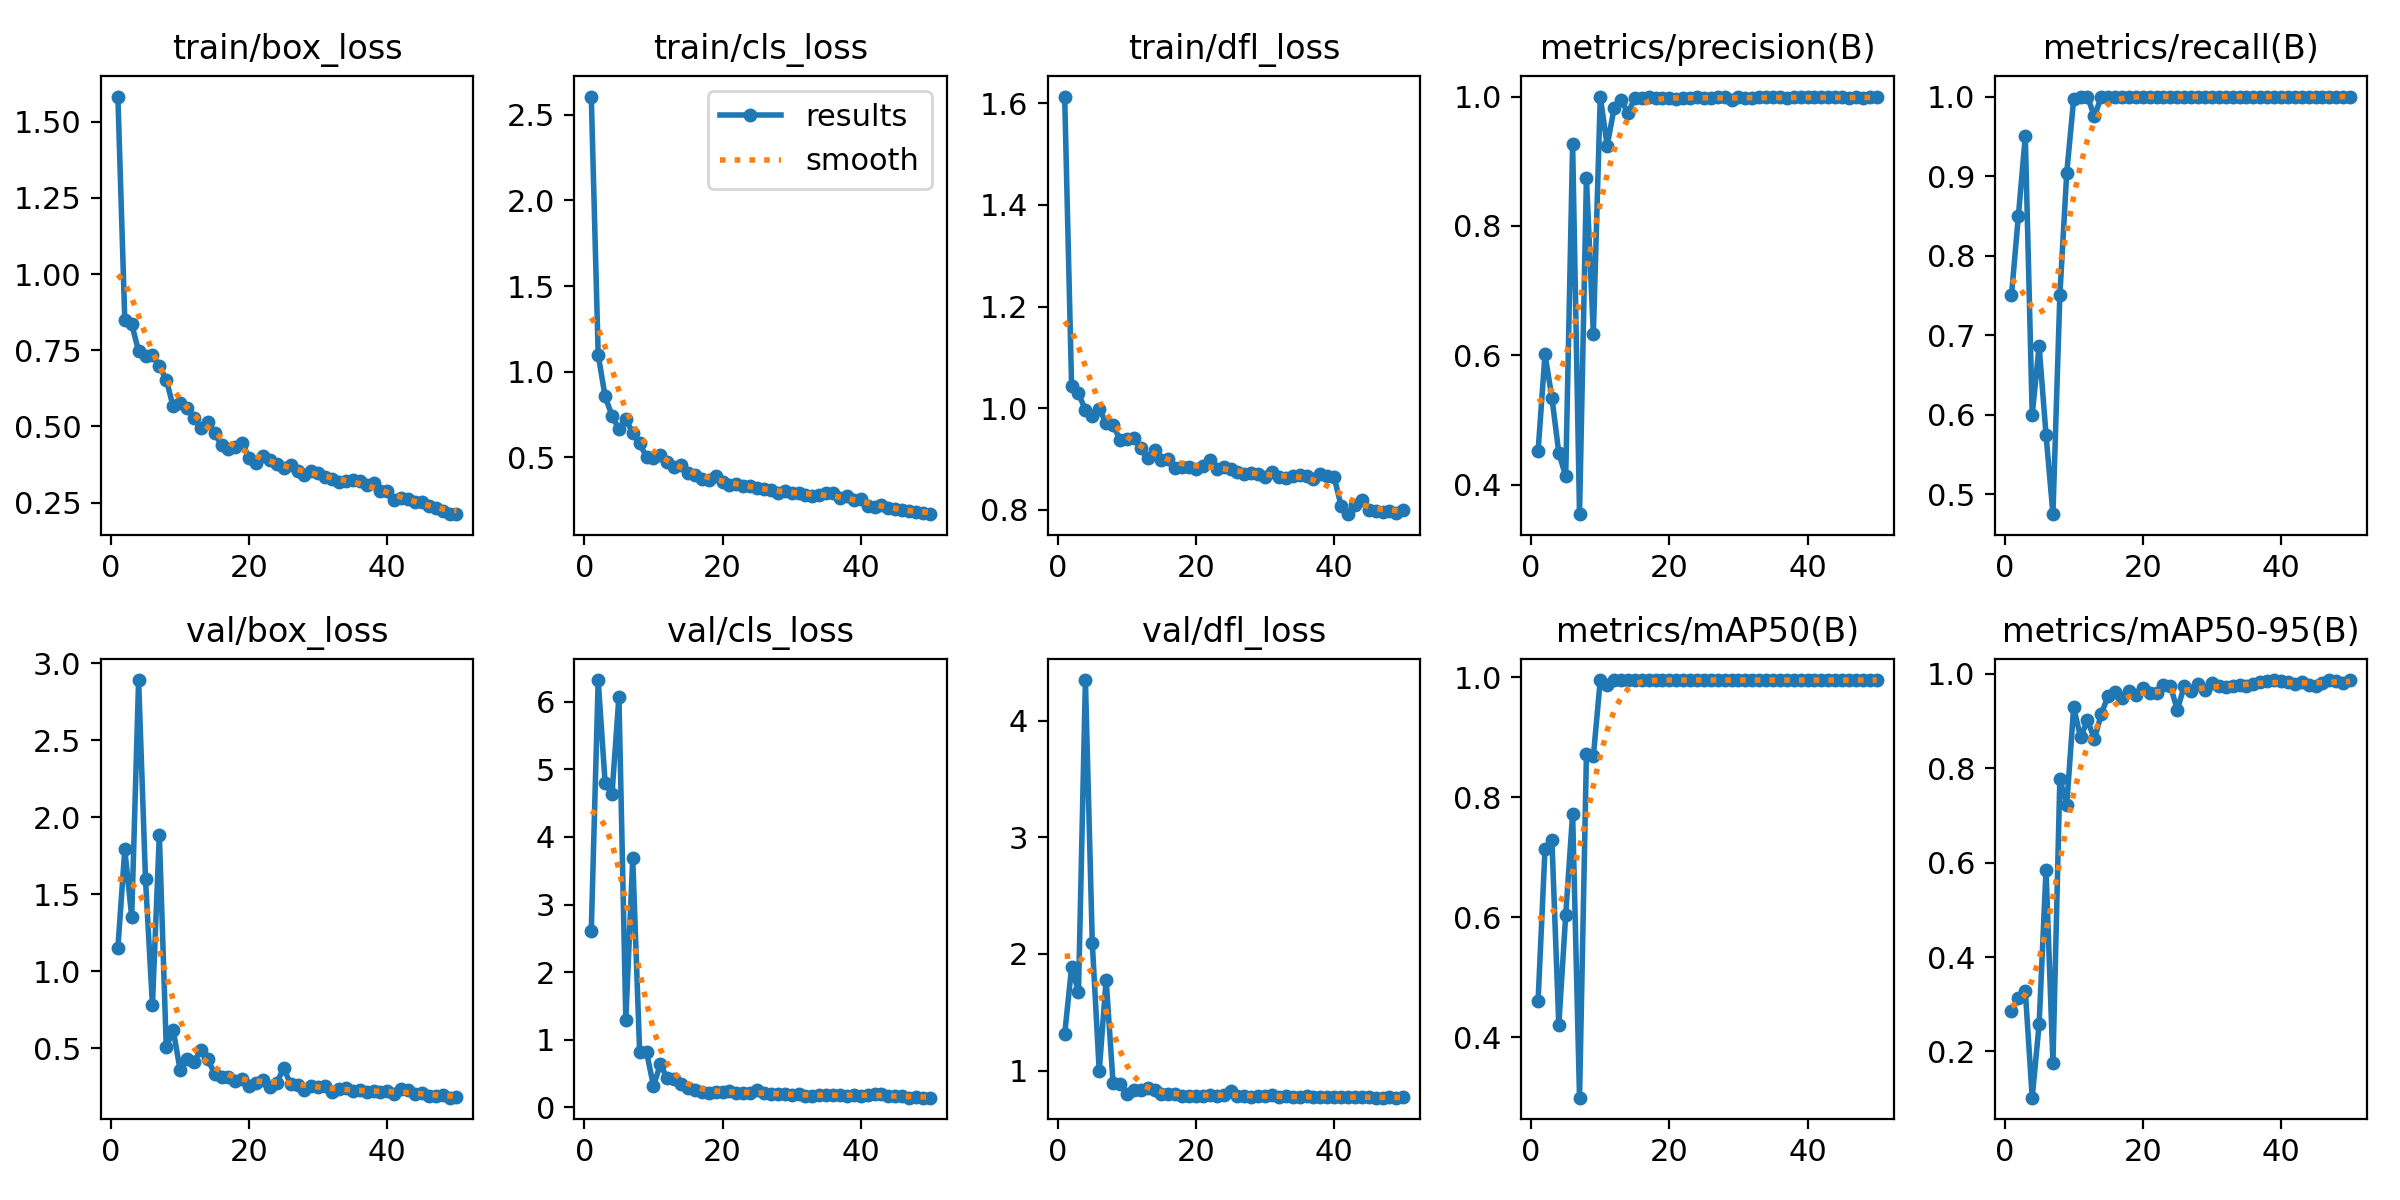

In [13]:
# We can also output some older school graphs if the tensor board isn't working for whatever reason...
Image(filename=f'{str(results.save_dir)}/results.png', width=1000)

## 4.1 Visualize the Training Data

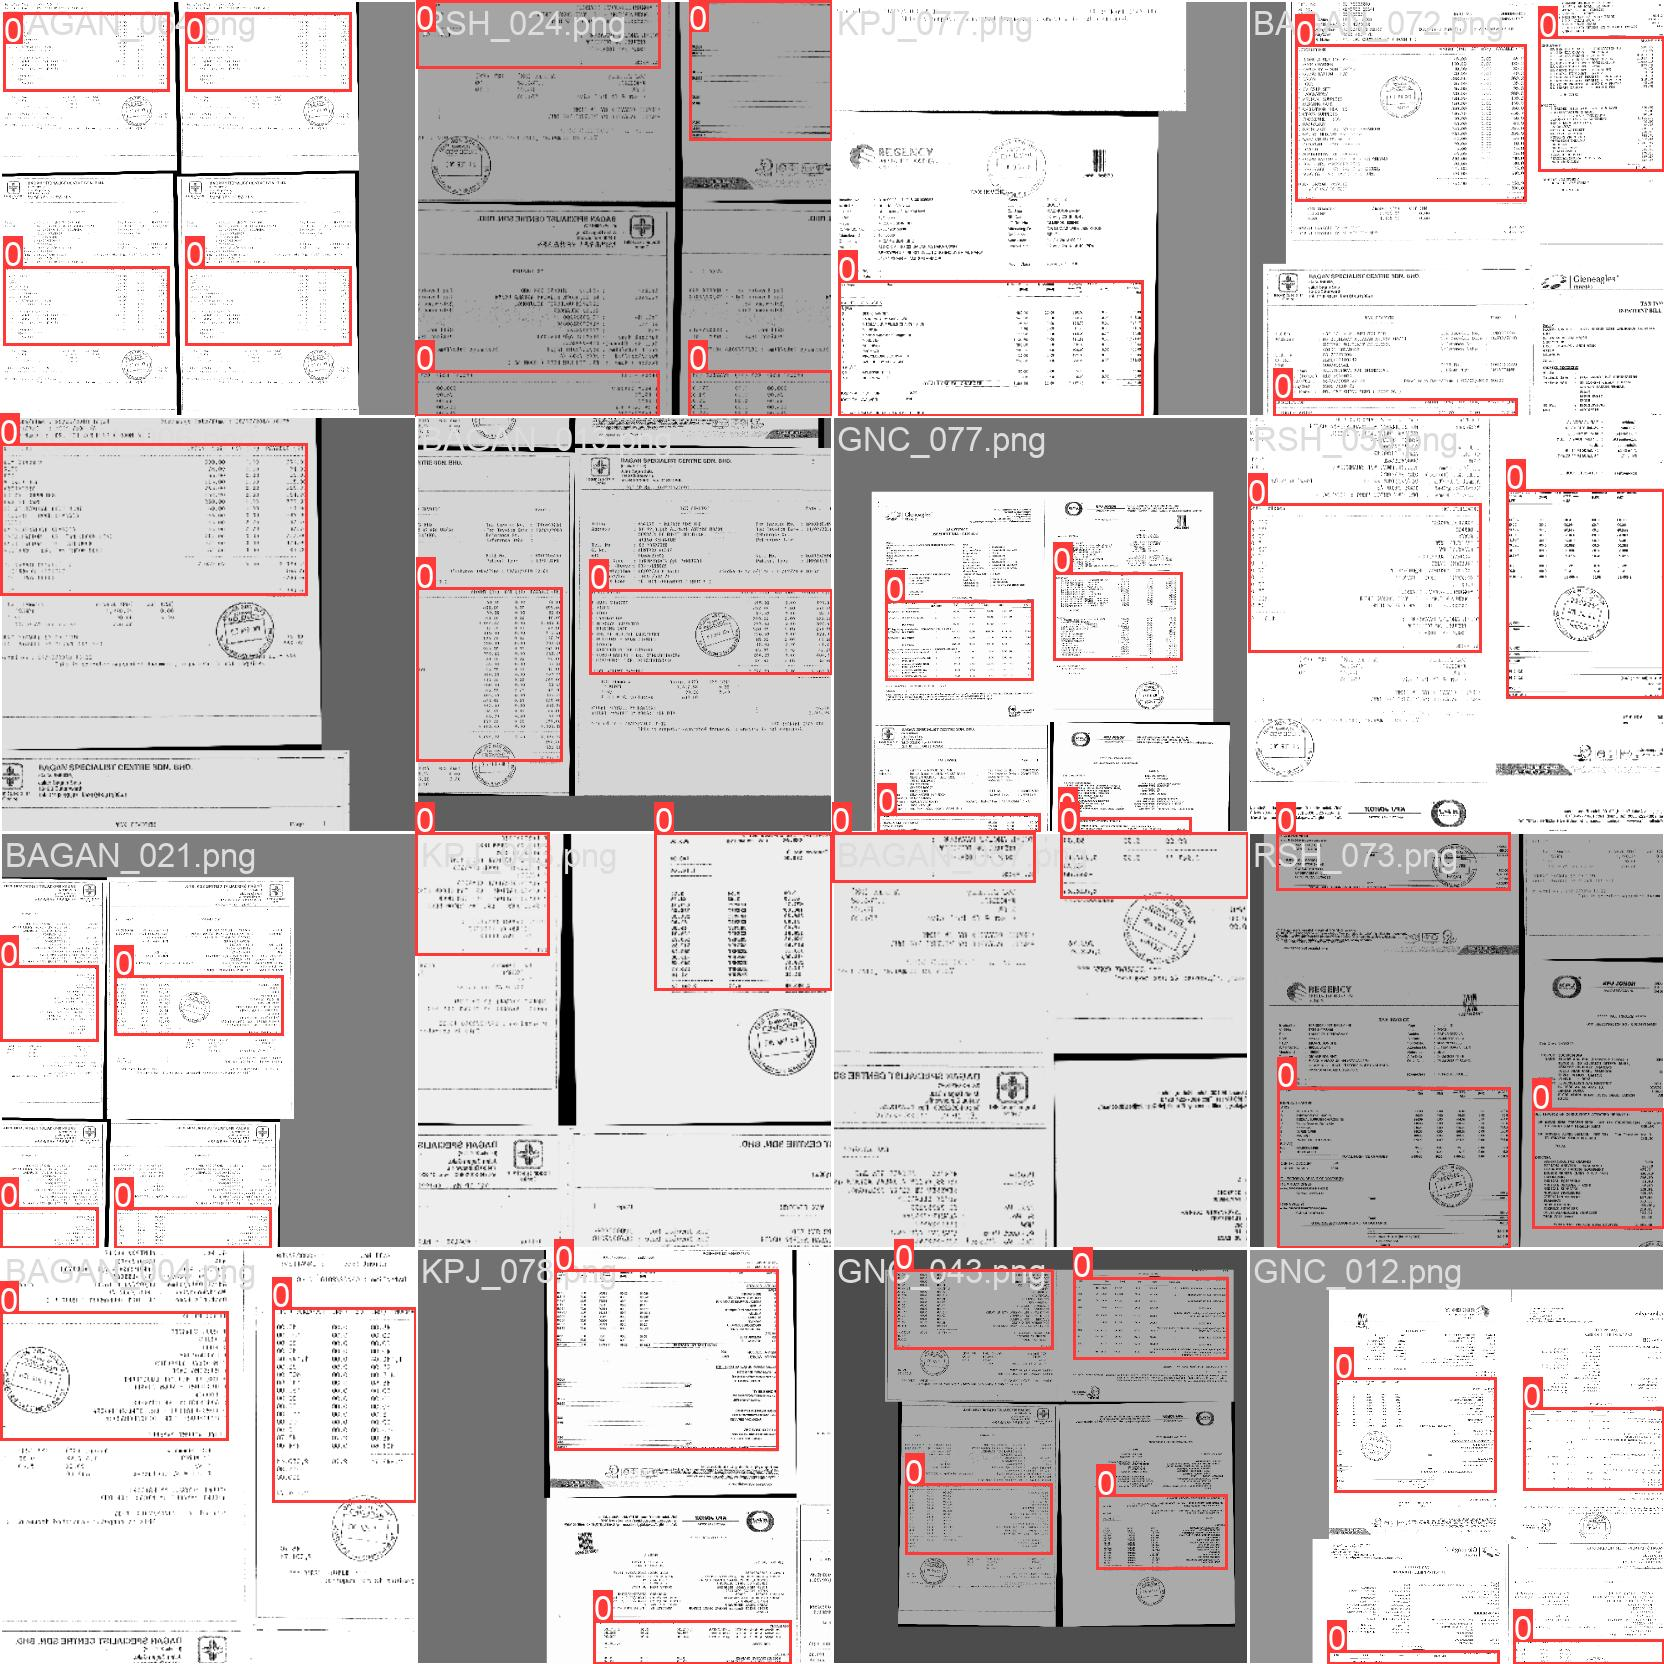

In [14]:
Image(filename=f'{str(results.save_dir)}/train_batch0.jpg', width=900)

## 4.2 Visualize the Labels of Validating Data

In [ ]:
Image(filename=f'{str(results.save_dir)}/val_batch0_labels.jpg', width=900)

## 4.3 Visualize the Predicted Testing Data

In [ ]:
Image(filename=f'{str(results.save_dir)}/val_batch0_pred.jpg', width=900)

# 5 Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.


In [15]:
source = 'CVAT/Testing Set'
model = YOLO(f'{str(results.save_dir)}/weights/best.pt')
# model = YOLO('best.pt')

deskewer = DataAugmentation(source)
deskewer.processor()

prediction = model.predict(source=source, save=True, imgsz=416)

1. CVAT/Testing Set\TEST_BAGAN_001.png
2. CVAT/Testing Set\TEST_BAGAN_002.png
3. CVAT/Testing Set\TEST_BAGAN_003.png
4. CVAT/Testing Set\TEST_BAGAN_004.png
5. CVAT/Testing Set\TEST_BAGAN_005.png
6. CVAT/Testing Set\TEST_BAGAN_006.png
7. CVAT/Testing Set\TEST_BAGAN_007.png
8. CVAT/Testing Set\TEST_BAGAN_008.png
9. CVAT/Testing Set\TEST_BAGAN_009.png
10. CVAT/Testing Set\TEST_BAGAN_010.png
11. CVAT/Testing Set\TEST_GNC_001.png
12. CVAT/Testing Set\TEST_GNC_002.png
13. CVAT/Testing Set\TEST_GNC_003.png
14. CVAT/Testing Set\TEST_GNC_004.png
15. CVAT/Testing Set\TEST_GNC_005.png
16. CVAT/Testing Set\TEST_GNC_006.png
17. CVAT/Testing Set\TEST_GNC_007.png
18. CVAT/Testing Set\TEST_GNC_008.png
19. CVAT/Testing Set\TEST_GNC_009.png
20. CVAT/Testing Set\TEST_GNC_010.png
21. CVAT/Testing Set\TEST_KPJ_001.png
22. CVAT/Testing Set\TEST_KPJ_002.png
23. CVAT/Testing Set\TEST_KPJ_003.png
24. CVAT/Testing Set\TEST_KPJ_004.png
25. CVAT/Testing Set\TEST_KPJ_005.png
26. CVAT/Testing Set\TEST_KPJ_006.png
2


image 1/40 C:\Users\CP1\Documents\GitHub\Itemized-Billing\CVAT\Testing Set\TEST_BAGAN_001.png: 416x320 1 table, 29.0ms
image 2/40 C:\Users\CP1\Documents\GitHub\Itemized-Billing\CVAT\Testing Set\TEST_BAGAN_002.png: 416x320 1 table, 26.6ms
image 3/40 C:\Users\CP1\Documents\GitHub\Itemized-Billing\CVAT\Testing Set\TEST_BAGAN_003.png: 416x320 1 table, 29.0ms
image 4/40 C:\Users\CP1\Documents\GitHub\Itemized-Billing\CVAT\Testing Set\TEST_BAGAN_004.png: 416x320 1 table, 28.0ms
image 5/40 C:\Users\CP1\Documents\GitHub\Itemized-Billing\CVAT\Testing Set\TEST_BAGAN_005.png: 416x320 1 table, 32.0ms
image 6/40 C:\Users\CP1\Documents\GitHub\Itemized-Billing\CVAT\Testing Set\TEST_BAGAN_006.png: 416x320 1 table, 27.0ms
image 7/40 C:\Users\CP1\Documents\GitHub\Itemized-Billing\CVAT\Testing Set\TEST_BAGAN_007.png: 416x320 1 table, 28.0ms
image 8/40 C:\Users\CP1\Documents\GitHub\Itemized-Billing\CVAT\Testing Set\TEST_BAGAN_008.png: 416x320 1 table, 28.0ms
image 9/40 C:\Users\CP1\Documents\GitHub\Itemiz